In [2]:
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('data/ted_main.csv')
X = df[['duration']].to_numpy()

In [3]:
def gaussian_kernel(h, x, xi):
    """
    Implementation of a gaussian kernel for Parzen-window estimation.

    Keyword arguments:
        h: window width
        x: point x for density estimation, 'd x 1'-dimensional numpy array
        xi: point from training sample, 'd x 1'-dimensional numpy array
    """
    return (1.0/(np.sqrt(2*np.pi) * h)) * np.exp(-(1.0/2.0)*((x-xi)/h)**2)

In [4]:
def gaussian_parzen_estimation(X, x, h):
    """
    Implementation of a parzen-window estimation.

    Keyword arguments:
        X: A 'n x d'-dimensional numpy array, where each sample is stored in a separate row. (= training sample)
        x: point x for density estimation, 'd x 1'-dimensional numpy array
        h: window width

    Returns the density estimate log(p(x)).
    """
    scores = []
    for x_s in X:
        scores.append(gaussian_kernel(h=h, x=x, xi=x_s))
    return np.mean(scores)

In [5]:
h = 10.0
W10 = [gaussian_parzen_estimation(X, x, h) for x in X.flatten()]
s10 = np.array([np.random.normal(random.choices(X.flatten(), W10), h) for _ in range(int(1e2))])

In [6]:
h = 20.0
W20 = [gaussian_parzen_estimation(X, x, h) for x in X.flatten()]
s20 = np.array([np.random.normal(random.choices(X.flatten(), W20), h) for _ in range(int(1e2))])

In [7]:
h = 50.0
W50 = [gaussian_parzen_estimation(X, x, h) for x in X.flatten()]
s50 = np.array([np.random.normal(random.choices(X.flatten(), W50), h) for _ in range(int(1e2))])

In [8]:
h = 100.0
W100 = [gaussian_parzen_estimation(X, x, h) for x in X.flatten()]
s100 = np.array([np.random.normal(random.choices(X.flatten(), W100), h) for _ in range(int(1e2))])

<Figure size 432x288 with 0 Axes>

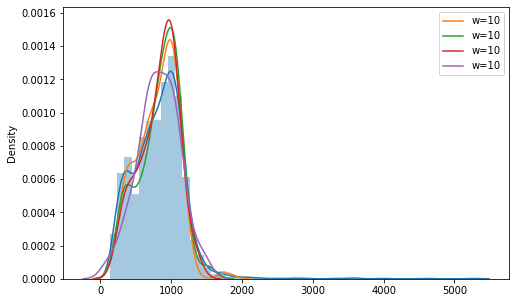

In [33]:
plt.figure()
plt.figure(figsize=(8, 5))

sns.distplot(X)
sns.distplot(s10, hist=False, label='w=10')
sns.distplot(s20, hist=False, label='w=10')
sns.distplot(s50, hist=False, label='w=10')
sns.distplot(s100, hist=False, label='w=10')

plt.legend()
plt.show()

In [10]:
from sklearn.neighbors import KernelDensity

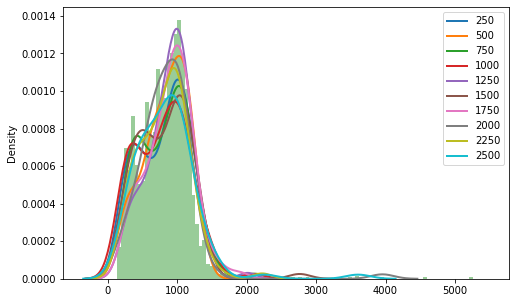

In [35]:
np.random.shuffle(X)

ns = range(250, len(X), 250)
scores = []
    
sns.distplot(X, hist=True, kde=True,
             bins=100, color = 'green', 
             kde_kws={'linewidth': 0})

for idx, n in enumerate(ns):
    kde = KernelDensity(kernel='gaussian', bandwidth=10.0).fit(X[:n])
    sns.distplot(kde.sample(100), hist=False,
                 kde_kws={'linewidth': 2}, label=str(n))
    scores.append(kde.score(X[n:]))

plt.legend()
plt.show()

Text(0, 0.5, 'total score')

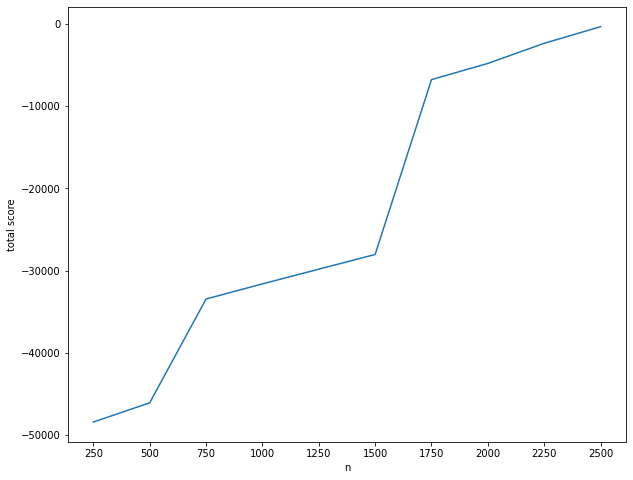

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(ns, scores)
plt.xticks(ns)
plt.xlabel('n')
plt.ylabel('total score')

<AxesSubplot:ylabel='Density'>

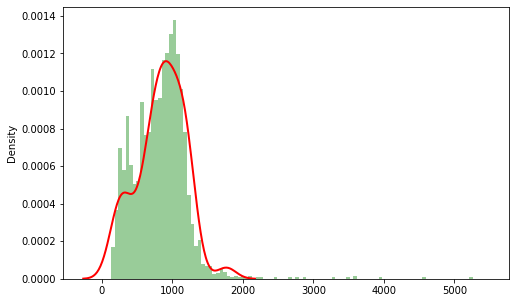

In [31]:
kde = KernelDensity(kernel='gaussian', bandwidth=10.0).fit(X)

plt.figure(figsize=(8, 5))

sns.distplot(X, hist=True, kde=True,
             bins=100, color = 'green', 
             kde_kws={'linewidth': 0})

sns.distplot(kde.sample(100), hist=False, kde=True,
             bins=100, color = 'red', 
             kde_kws={'linewidth': 2})